In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [3]:
deaths_reported = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [4]:
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [5]:
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/07-15-2020.csv')

In [6]:
# Fetching all the columns from confirmed dataset
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '12/8/20', '12/9/20', '12/10/20', '12/11/20', '12/12/20', '12/13/20',
       '12/14/20', '12/15/20', '12/16/20', '12/17/20'],
      dtype='object', length=335)

In [7]:
# Extracting the date columns
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
deaths = deaths_reported.loc[:, cols[4]:cols[-1]]
recoveries = recovered_cases.loc[:, cols[4]:cols[-1]]

In [8]:
# Range of date
dates = confirmed.keys()

# Summary
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

# Confirmed
china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
france_cases = [] 
germany_cases = [] 
uk_cases = [] 
russia_cases = []
india_cases = []

# Death
china_deaths = [] 
italy_deaths = []
us_deaths = [] 
spain_deaths = [] 
france_deaths = [] 
germany_deaths = [] 
uk_deaths = [] 
russia_deaths = []
india_deaths = []

# Recovered
china_recoveries = [] 
italy_recoveries = []
us_recoveries = [] 
spain_recoveries = [] 
france_recoveries = [] 
germany_recoveries = [] 
uk_recoveries = [] 
russia_recoveries = [] 
india_recoveries = []

In [9]:
# Fill with the dataset
for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    china_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Russia'][i].sum())
    india_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())
    
    china_deaths.append(deaths_reported[deaths_reported['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_reported[deaths_reported['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Spain'][i].sum())
    france_deaths.append(deaths_reported[deaths_reported['Country/Region']=='France'][i].sum())
    germany_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Germany'][i].sum())
    uk_deaths.append(deaths_reported[deaths_reported['Country/Region']=='United Kingdom'][i].sum())
    russia_deaths.append(deaths_reported[deaths_reported['Country/Region']=='Russia'][i].sum())
    india_deaths.append(deaths_reported[deaths_reported['Country/Region']=='India'][i].sum())
  
    china_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='US'][i].sum())
    spain_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Spain'][i].sum())
    france_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='France'][i].sum())
    germany_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Germany'][i].sum())
    uk_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='United Kingdom'][i].sum())
    russia_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Russia'][i].sum())
    india_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='India'][i].sum())

In [10]:
days_since_1_1 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [131]:
days_in_future = 30
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-30]
print(future_forecast)

[[  0]
 [  1]
 [  2]
 [  3]
 [  4]
 [  5]
 [  6]
 [  7]
 [  8]
 [  9]
 [ 10]
 [ 11]
 [ 12]
 [ 13]
 [ 14]
 [ 15]
 [ 16]
 [ 17]
 [ 18]
 [ 19]
 [ 20]
 [ 21]
 [ 22]
 [ 23]
 [ 24]
 [ 25]
 [ 26]
 [ 27]
 [ 28]
 [ 29]
 [ 30]
 [ 31]
 [ 32]
 [ 33]
 [ 34]
 [ 35]
 [ 36]
 [ 37]
 [ 38]
 [ 39]
 [ 40]
 [ 41]
 [ 42]
 [ 43]
 [ 44]
 [ 45]
 [ 46]
 [ 47]
 [ 48]
 [ 49]
 [ 50]
 [ 51]
 [ 52]
 [ 53]
 [ 54]
 [ 55]
 [ 56]
 [ 57]
 [ 58]
 [ 59]
 [ 60]
 [ 61]
 [ 62]
 [ 63]
 [ 64]
 [ 65]
 [ 66]
 [ 67]
 [ 68]
 [ 69]
 [ 70]
 [ 71]
 [ 72]
 [ 73]
 [ 74]
 [ 75]
 [ 76]
 [ 77]
 [ 78]
 [ 79]
 [ 80]
 [ 81]
 [ 82]
 [ 83]
 [ 84]
 [ 85]
 [ 86]
 [ 87]
 [ 88]
 [ 89]
 [ 90]
 [ 91]
 [ 92]
 [ 93]
 [ 94]
 [ 95]
 [ 96]
 [ 97]
 [ 98]
 [ 99]
 [100]
 [101]
 [102]
 [103]
 [104]
 [105]
 [106]
 [107]
 [108]
 [109]
 [110]
 [111]
 [112]
 [113]
 [114]
 [115]
 [116]
 [117]
 [118]
 [119]
 [120]
 [121]
 [122]
 [123]
 [124]
 [125]
 [126]
 [127]
 [128]
 [129]
 [130]
 [131]
 [132]
 [133]
 [134]
 [135]
 [136]
 [137]
 [138]
 [139]
 [140]
 [141]
 [142]

In [132]:
start = '1/12/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [138]:
def prediction(x):
    x_train_confirmed, x_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_1, x, 
                                                                                                test_size=0.2, shuffle=False)
    # transform data for polynomial regression
    model = PolynomialFeatures(degree=2)
    model_x_train_confirmed = model.fit_transform(x_train_confirmed)
    model_x_test_confirmed = model.fit_transform(x_test_confirmed)
    model_future_forecast = model.fit_transform(future_forecast)

    # polynomial regression
    linear_model = LinearRegression(normalize=True, fit_intercept=False)
    linear_model.fit(model_x_train_confirmed, y_train_confirmed)
    test_linear_pred = linear_model.predict(model_x_test_confirmed)
    linear_pred = linear_model.predict(model_future_forecast)
    print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
    print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

    plt.plot(y_test_confirmed)
    plt.plot(test_linear_pred)
    plt.legend(['Test Data', 'Polynomial Regression Predictions'])
    print(linear_model.score(model_x_test_confirmed,y_test_confirmed))

    linear_pred = linear_pred.reshape(1,-1)[0]
    model_df = pd.DataFrame({'Date': future_forecast_dates[-20:], 'Predicted number of Confirmed Cases': np.round(linear_pred[-20:])})
    print(poly_df)
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 9))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color=color)
    plt.title('Number of Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/1/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
    

# Cases Prediction

MAE: 4610620.4577909075
MSE: 34492258688874.74
0.7165876464038675
          Date  Predicted number of Confirmed Cases
0   12/18/2020                           68014520.0
1   12/19/2020                           68461915.0
2   12/20/2020                           68910774.0
3   12/21/2020                           69361097.0
4   12/22/2020                           69812884.0
5   12/23/2020                           70266136.0
6   12/24/2020                           70720852.0
7   12/25/2020                           71177032.0
8   12/26/2020                           71634677.0
9   12/27/2020                           72093786.0
10  12/28/2020                           72554359.0
11  12/29/2020                           73016396.0
12  12/30/2020                           73479898.0
13  12/31/2020                           73944864.0
14  01/01/2021                           74411294.0
15  01/02/2021                           74879188.0
16  01/03/2021                           75348547.

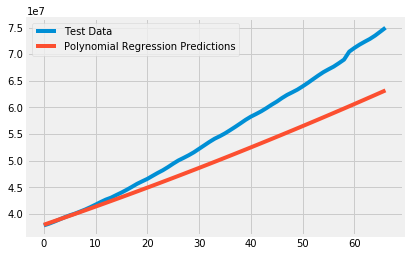

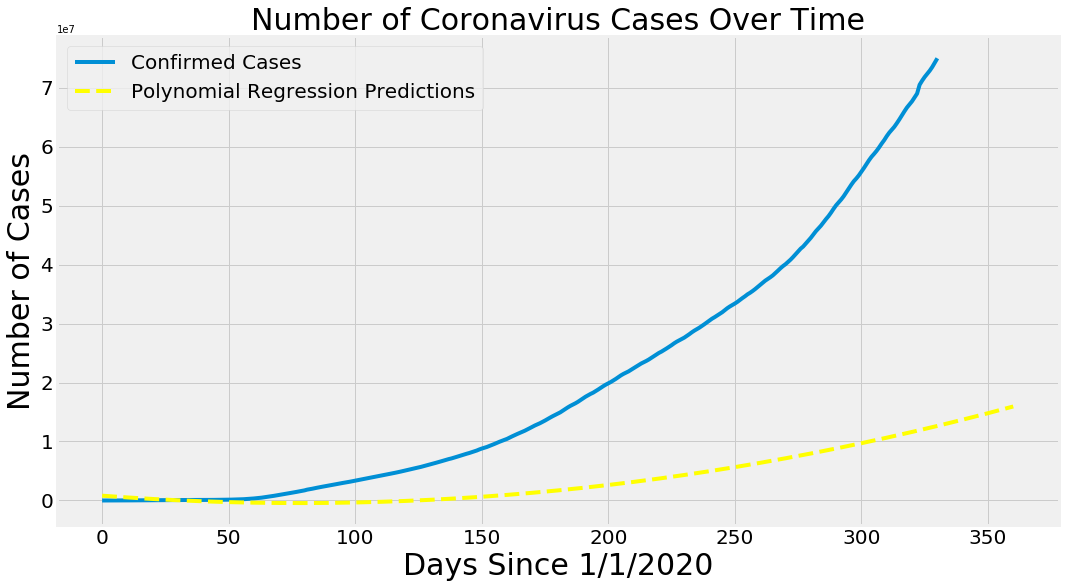

In [139]:
prediction(world_cases)
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'yellow')

MAE: 933308.8954493942
MSE: 1461503125639.8643
-1.1570722474433706
          Date  Predicted number of Confirmed Cases
0   12/18/2020                           13803906.0
1   12/19/2020                           13912393.0
2   12/20/2020                           14021291.0
3   12/21/2020                           14130601.0
4   12/22/2020                           14240322.0
5   12/23/2020                           14350455.0
6   12/24/2020                           14461000.0
7   12/25/2020                           14571957.0
8   12/26/2020                           14683325.0
9   12/27/2020                           14795105.0
10  12/28/2020                           14907297.0
11  12/29/2020                           15019900.0
12  12/30/2020                           15132915.0
13  12/31/2020                           15246342.0
14  01/01/2021                           15360180.0
15  01/02/2021                           15474430.0
16  01/03/2021                           15589092

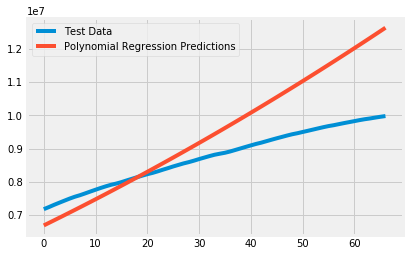

In [142]:
prediction(india_cases)

MAE: 1247491.5508150382
MSE: 2910262553266.8784
0.6375387574461939
          Date  Predicted number of Confirmed Cases
0   12/18/2020                           13993877.0
1   12/19/2020                           14077797.0
2   12/20/2020                           14161966.0
3   12/21/2020                           14246383.0
4   12/22/2020                           14331048.0
5   12/23/2020                           14415962.0
6   12/24/2020                           14501124.0
7   12/25/2020                           14586535.0
8   12/26/2020                           14672194.0
9   12/27/2020                           14758101.0
10  12/28/2020                           14844257.0
11  12/29/2020                           14930661.0
12  12/30/2020                           15017314.0
13  12/31/2020                           15104214.0
14  01/01/2021                           15191364.0
15  01/02/2021                           15278761.0
16  01/03/2021                           15366407

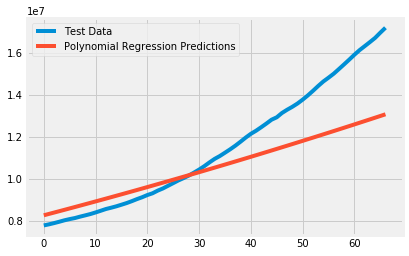

In [143]:
prediction(us_cases)

MAE: 24949.03424214885
MSE: 708778810.480775
-552.9496114819837
          Date  Predicted number of Confirmed Cases
0   12/18/2020                              45907.0
1   12/19/2020                              45328.0
2   12/20/2020                              44746.0
3   12/21/2020                              44160.0
4   12/22/2020                              43570.0
5   12/23/2020                              42977.0
6   12/24/2020                              42381.0
7   12/25/2020                              41781.0
8   12/26/2020                              41177.0
9   12/27/2020                              40570.0
10  12/28/2020                              39959.0
11  12/29/2020                              39345.0
12  12/30/2020                              38728.0
13  12/31/2020                              38106.0
14  01/01/2021                              37482.0
15  01/02/2021                              36854.0
16  01/03/2021                              36222.0


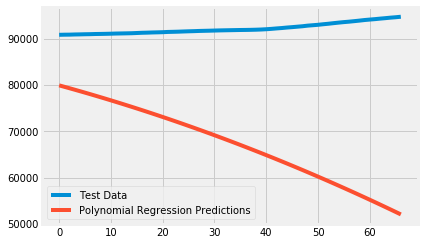

In [144]:
prediction(china_cases)

MAE: 1102322.5599515378
MSE: 1430425732759.1934
-3.721668735315801
          Date  Predicted number of Confirmed Cases
0   12/18/2020                             927951.0
1   12/19/2020                             933339.0
2   12/20/2020                             938743.0
3   12/21/2020                             944162.0
4   12/22/2020                             949598.0
5   12/23/2020                             955049.0
6   12/24/2020                             960516.0
7   12/25/2020                             965999.0
8   12/26/2020                             971497.0
9   12/27/2020                             977012.0
10  12/28/2020                             982542.0
11  12/29/2020                             988089.0
12  12/30/2020                             993651.0
13  12/31/2020                             999229.0
14  01/01/2021                            1004822.0
15  01/02/2021                            1010432.0
16  01/03/2021                            1016057

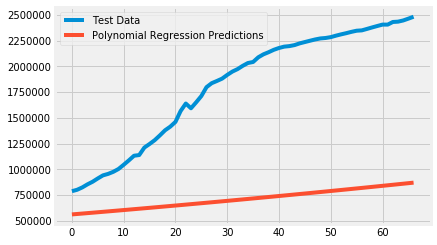

In [145]:
prediction(france_cases)

MAE: 515976.34969210037
MSE: 377038466531.1861
-2.285157047486419
          Date  Predicted number of Confirmed Cases
0   12/18/2020                             303850.0
1   12/19/2020                             303916.0
2   12/20/2020                             303976.0
3   12/21/2020                             304031.0
4   12/22/2020                             304080.0
5   12/23/2020                             304124.0
6   12/24/2020                             304162.0
7   12/25/2020                             304195.0
8   12/26/2020                             304222.0
9   12/27/2020                             304244.0
10  12/28/2020                             304260.0
11  12/29/2020                             304271.0
12  12/30/2020                             304277.0
13  12/31/2020                             304276.0
14  01/01/2021                             304271.0
15  01/02/2021                             304259.0
16  01/03/2021                             304243.

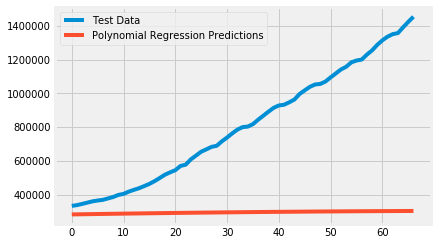

In [146]:
prediction(germany_cases)

MAE: 787445.805293137
MSE: 750777744389.5919
-3.8248120042570193
          Date  Predicted number of Confirmed Cases
0   12/18/2020                             589572.0
1   12/19/2020                             591216.0
2   12/20/2020                             592859.0
3   12/21/2020                             594500.0
4   12/22/2020                             596139.0
5   12/23/2020                             597778.0
6   12/24/2020                             599414.0
7   12/25/2020                             601050.0
8   12/26/2020                             602683.0
9   12/27/2020                             604316.0
10  12/28/2020                             605947.0
11  12/29/2020                             607576.0
12  12/30/2020                             609205.0
13  12/31/2020                             610831.0
14  01/01/2021                             612457.0
15  01/02/2021                             614081.0
16  01/03/2021                             615703.0

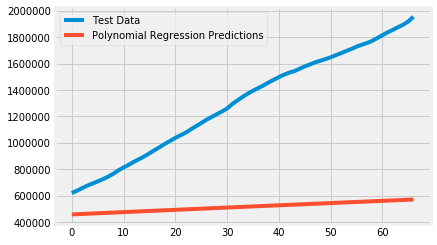

In [147]:
prediction(uk_cases)

MAE: 489543.1258525091
MSE: 269765348214.9991
-2.3466635583000843
          Date  Predicted number of Confirmed Cases
0   12/18/2020                            1181473.0
1   12/19/2020                            1188254.0
2   12/20/2020                            1195055.0
3   12/21/2020                            1201876.0
4   12/22/2020                            1208716.0
5   12/23/2020                            1215577.0
6   12/24/2020                            1222457.0
7   12/25/2020                            1229356.0
8   12/26/2020                            1236276.0
9   12/27/2020                            1243215.0
10  12/28/2020                            1250174.0
11  12/29/2020                            1257153.0
12  12/30/2020                            1264151.0
13  12/31/2020                            1271170.0
14  01/01/2021                            1278208.0
15  01/02/2021                            1285266.0
16  01/03/2021                            1292343.

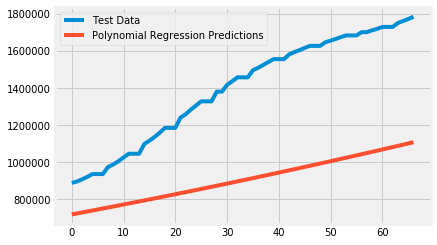

In [148]:
prediction(spain_cases)

MAE: 271917.21284887573
MSE: 124756341263.45929
0.3106512022733756
          Date  Predicted number of Confirmed Cases
0   12/18/2020                            2130310.0
1   12/19/2020                            2141439.0
2   12/20/2020                            2152595.0
3   12/21/2020                            2163777.0
4   12/22/2020                            2174986.0
5   12/23/2020                            2186222.0
6   12/24/2020                            2197485.0
7   12/25/2020                            2208774.0
8   12/26/2020                            2220091.0
9   12/27/2020                            2231434.0
10  12/28/2020                            2242803.0
11  12/29/2020                            2254200.0
12  12/30/2020                            2265623.0
13  12/31/2020                            2277073.0
14  01/01/2021                            2288549.0
15  01/02/2021                            2300053.0
16  01/03/2021                            2311583

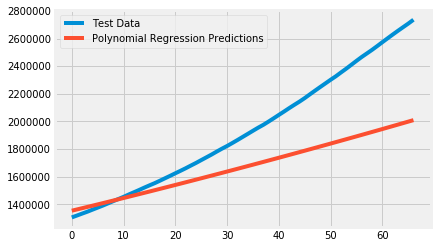

In [149]:
prediction(russia_cases)

MAE: 838780.7850930964
MSE: 983455703549.5144
-2.634631355073536
          Date  Predicted number of Confirmed Cases
0   12/18/2020                             252633.0
1   12/19/2020                             251694.0
2   12/20/2020                             250743.0
3   12/21/2020                             249782.0
4   12/22/2020                             248809.0
5   12/23/2020                             247827.0
6   12/24/2020                             246833.0
7   12/25/2020                             245829.0
8   12/26/2020                             244814.0
9   12/27/2020                             243788.0
10  12/28/2020                             242752.0
11  12/29/2020                             241705.0
12  12/30/2020                             240647.0
13  12/31/2020                             239578.0
14  01/01/2021                             238499.0
15  01/02/2021                             237409.0
16  01/03/2021                             236308.0

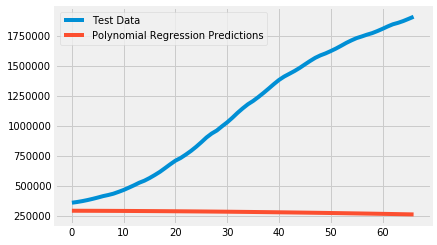

In [150]:
prediction(italy_cases)

# Recoveries Prediction

MAE: 817288.5836635466
MSE: 1427308387724.5173
0.9597446903508242
          Date  Predicted number of Confirmed Cases
0   12/18/2020                           50042390.0
1   12/19/2020                           50398679.0
2   12/20/2020                           50756219.0
3   12/21/2020                           51115008.0
4   12/22/2020                           51475048.0
5   12/23/2020                           51836338.0
6   12/24/2020                           52198879.0
7   12/25/2020                           52562670.0
8   12/26/2020                           52927711.0
9   12/27/2020                           53294002.0
10  12/28/2020                           53661544.0
11  12/29/2020                           54030336.0
12  12/30/2020                           54400378.0
13  12/31/2020                           54771671.0
14  01/01/2021                           55144213.0
15  01/02/2021                           55518006.0
16  01/03/2021                           55893050.

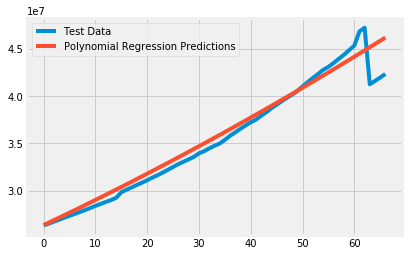

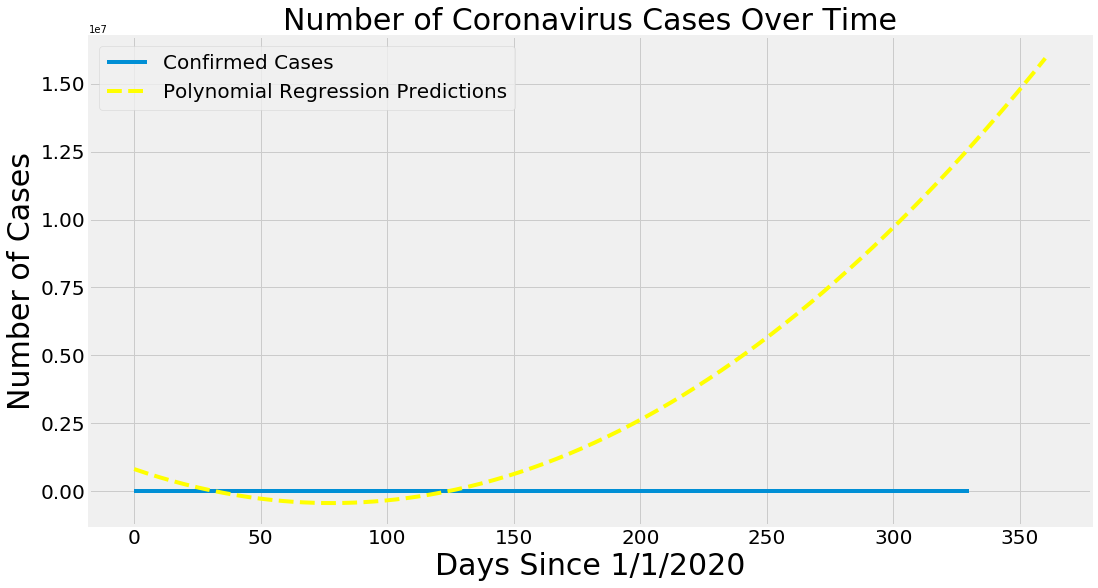

In [175]:
prediction(total_recovered)
plot_predictions(adjusted_dates, recovery_rate, linear_pred, 'Polynomial Regression Predictions', 'yellow')

MAE: 557299.0066259186
MSE: 385599711693.0832
0.5721888754882067
          Date  Predicted number of Confirmed Cases
0   12/18/2020                           11434463.0
1   12/19/2020                           11526292.0
2   12/20/2020                           11618475.0
3   12/21/2020                           11711013.0
4   12/22/2020                           11803904.0
5   12/23/2020                           11897149.0
6   12/24/2020                           11990749.0
7   12/25/2020                           12084702.0
8   12/26/2020                           12179010.0
9   12/27/2020                           12273671.0
10  12/28/2020                           12368687.0
11  12/29/2020                           12464057.0
12  12/30/2020                           12559781.0
13  12/31/2020                           12655859.0
14  01/01/2021                           12752291.0
15  01/02/2021                           12849078.0
16  01/03/2021                           12946218.0

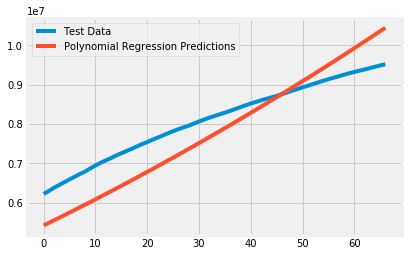

In [173]:
prediction(india_recoveries)

MAE: 524.745265821948
MSE: 348612.6164711581
-0.5999546389127528
          Date  Predicted number of Confirmed Cases
0   12/18/2020                               3112.0
1   12/19/2020                               3122.0
2   12/20/2020                               3133.0
3   12/21/2020                               3143.0
4   12/22/2020                               3154.0
5   12/23/2020                               3164.0
6   12/24/2020                               3175.0
7   12/25/2020                               3185.0
8   12/26/2020                               3196.0
9   12/27/2020                               3206.0
10  12/28/2020                               3217.0
11  12/29/2020                               3227.0
12  12/30/2020                               3238.0
13  12/31/2020                               3248.0
14  01/01/2021                               3259.0
15  01/02/2021                               3269.0
16  01/03/2021                               3280.0

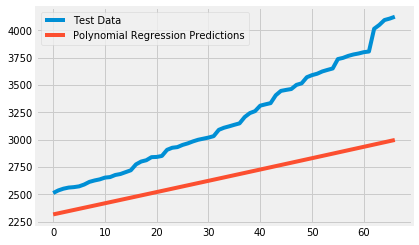

In [174]:
prediction(uk_recoveries)

MAE: 573846.1997771321
MSE: 1891891762363.335
-0.03399551616159968
          Date  Predicted number of Confirmed Cases
0   12/18/2020                            5974327.0
1   12/19/2020                            6015206.0
2   12/20/2020                            6056224.0
3   12/21/2020                            6097379.0
4   12/22/2020                            6138673.0
5   12/23/2020                            6180105.0
6   12/24/2020                            6221676.0
7   12/25/2020                            6263384.0
8   12/26/2020                            6305231.0
9   12/27/2020                            6347216.0
10  12/28/2020                            6389339.0
11  12/29/2020                            6431601.0
12  12/30/2020                            6474001.0
13  12/31/2020                            6516539.0
14  01/01/2021                            6559215.0
15  01/02/2021                            6602029.0
16  01/03/2021                            6644982

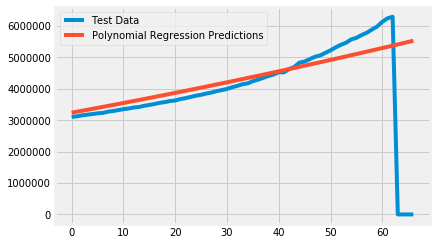

In [155]:
prediction(us_recoveries)

MAE: 27463.737874433897
MSE: 982279604.1578577
0.0
          Date  Predicted number of Confirmed Cases
0   12/18/2020                              81549.0
1   12/19/2020                              80363.0
2   12/20/2020                              79167.0
3   12/21/2020                              77963.0
4   12/22/2020                              76749.0
5   12/23/2020                              75526.0
6   12/24/2020                              74294.0
7   12/25/2020                              73052.0
8   12/26/2020                              71802.0
9   12/27/2020                              70542.0
10  12/28/2020                              69273.0
11  12/29/2020                              67995.0
12  12/30/2020                              66707.0
13  12/31/2020                              65411.0
14  01/01/2021                              64105.0
15  01/02/2021                              62790.0
16  01/03/2021                              61466.0
17  01/04/202

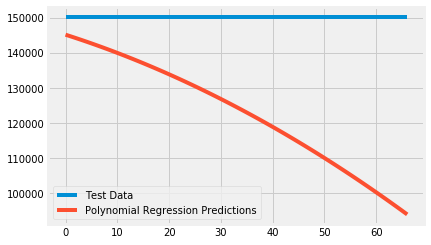

In [156]:
prediction(spain_recoveries)

MAE: 290112.04762189306
MSE: 141140015973.43436
-1.3043600448064359
          Date  Predicted number of Confirmed Cases
0   12/18/2020                             292994.0
1   12/19/2020                             293289.0
2   12/20/2020                             293580.0
3   12/21/2020                             293867.0
4   12/22/2020                             294150.0
5   12/23/2020                             294429.0
6   12/24/2020                             294704.0
7   12/25/2020                             294975.0
8   12/26/2020                             295242.0
9   12/27/2020                             295505.0
10  12/28/2020                             295763.0
11  12/29/2020                             296018.0
12  12/30/2020                             296268.0
13  12/31/2020                             296515.0
14  01/01/2021                             296757.0
15  01/02/2021                             296995.0
16  01/03/2021                             29723

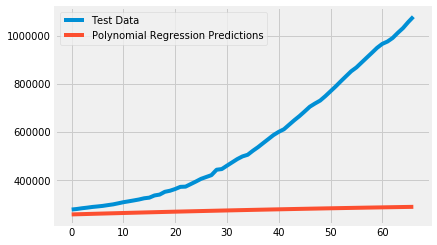

In [157]:
prediction(germany_recoveries)

MAE: 41846.4703859673
MSE: 2394130578.857075
-2.378686874630723
          Date  Predicted number of Confirmed Cases
0   12/18/2020                             103699.0
1   12/19/2020                             103660.0
2   12/20/2020                             103619.0
3   12/21/2020                             103575.0
4   12/22/2020                             103530.0
5   12/23/2020                             103481.0
6   12/24/2020                             103431.0
7   12/25/2020                             103378.0
8   12/26/2020                             103322.0
9   12/27/2020                             103264.0
10  12/28/2020                             103204.0
11  12/29/2020                             103142.0
12  12/30/2020                             103077.0
13  12/31/2020                             103010.0
14  01/01/2021                             102940.0
15  01/02/2021                             102868.0
16  01/03/2021                             102794.0


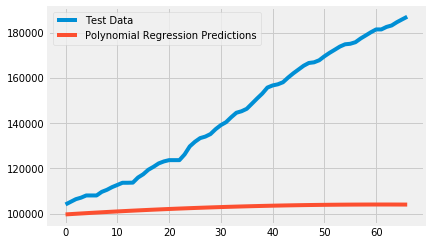

In [158]:
prediction(france_recoveries)

MAE: 280976.12819402525
MSE: 165941866677.50452
-0.8123923892882647
          Date  Predicted number of Confirmed Cases
0   12/18/2020                             274812.0
1   12/19/2020                             275043.0
2   12/20/2020                             275269.0
3   12/21/2020                             275490.0
4   12/22/2020                             275708.0
5   12/23/2020                             275921.0
6   12/24/2020                             276130.0
7   12/25/2020                             276335.0
8   12/26/2020                             276536.0
9   12/27/2020                             276732.0
10  12/28/2020                             276924.0
11  12/29/2020                             277112.0
12  12/30/2020                             277295.0
13  12/31/2020                             277475.0
14  01/01/2021                             277650.0
15  01/02/2021                             277821.0
16  01/03/2021                             27798

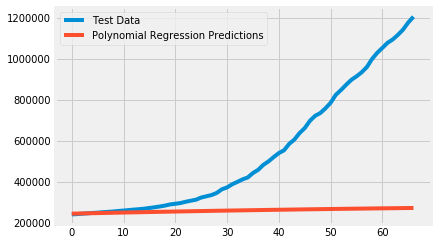

In [159]:
prediction(italy_recoveries)

MAE: 33943.2091523822
MSE: 1312633507.372736
-2575.0962952011305
          Date  Predicted number of Confirmed Cases
0   12/18/2020                              21455.0
1   12/19/2020                              20604.0
2   12/20/2020                              19748.0
3   12/21/2020                              18886.0
4   12/22/2020                              18020.0
5   12/23/2020                              17147.0
6   12/24/2020                              16270.0
7   12/25/2020                              15388.0
8   12/26/2020                              14500.0
9   12/27/2020                              13607.0
10  12/28/2020                              12708.0
11  12/29/2020                              11805.0
12  12/30/2020                              10896.0
13  12/31/2020                               9982.0
14  01/01/2021                               9062.0
15  01/02/2021                               8138.0
16  01/03/2021                               7208.0

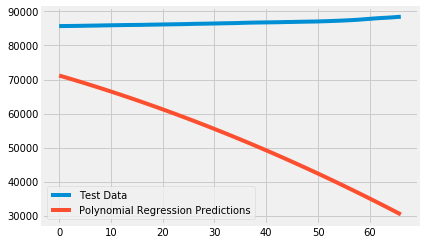

In [160]:
prediction(china_recoveries)

# Deaths Prediction

MAE: 39924.64938667233
MSE: 1980200426.2692726
0.9337565967812702
          Date  Predicted number of Confirmed Cases
0   12/18/2020                            1715532.0
1   12/19/2020                            1723959.0
2   12/20/2020                            1732406.0
3   12/21/2020                            1740870.0
4   12/22/2020                            1749354.0
5   12/23/2020                            1757856.0
6   12/24/2020                            1766377.0
7   12/25/2020                            1774916.0
8   12/26/2020                            1783474.0
9   12/27/2020                            1792051.0
10  12/28/2020                            1800646.0
11  12/29/2020                            1809260.0
12  12/30/2020                            1817892.0
13  12/31/2020                            1826544.0
14  01/01/2021                            1835213.0
15  01/02/2021                            1843902.0
16  01/03/2021                            1852609.

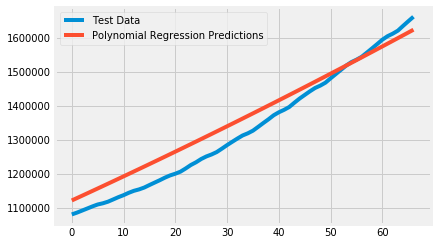

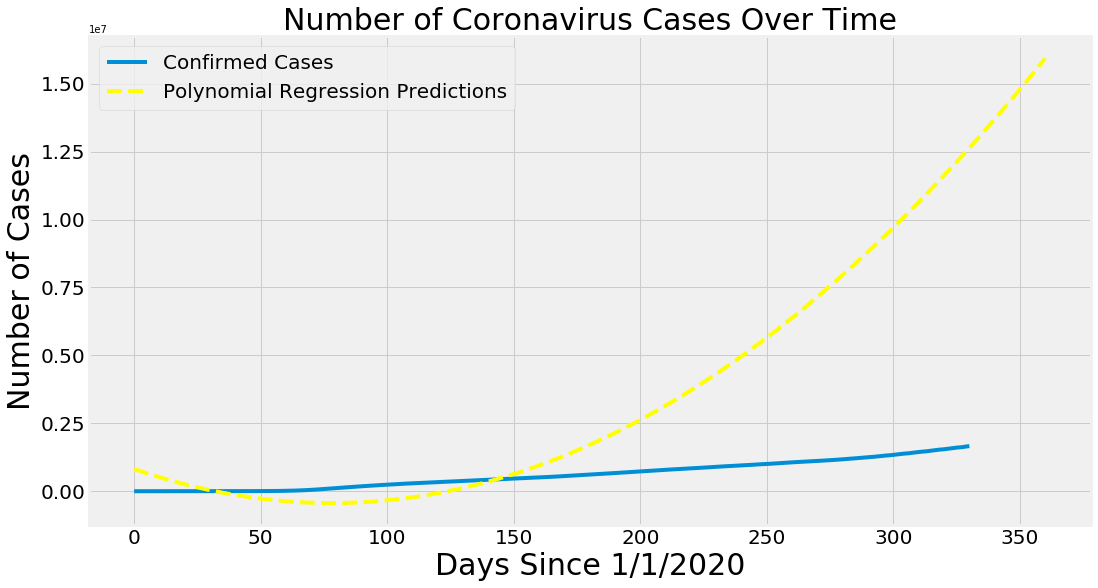

In [161]:
prediction(total_deaths)
plot_predictions(adjusted_dates, total_deaths, linear_pred, 'Polynomial Regression Predictions', 'yellow')

In [162]:
prediction(india_deaths)

LinAlgError: SVD did not converge in Linear Least Squares

In [ ]:
prediction(us_deaths)

In [ ]:
prediction(uk_deaths)

MAE: 15194.920334156708
MSE: 288637957.23120856
-10.297568202740319
          Date  Predicted number of Confirmed Cases
0   12/18/2020                              18348.0
1   12/19/2020                              18143.0
2   12/20/2020                              17936.0
3   12/21/2020                              17727.0
4   12/22/2020                              17517.0
5   12/23/2020                              17305.0
6   12/24/2020                              17091.0
7   12/25/2020                              16876.0
8   12/26/2020                              16659.0
9   12/27/2020                              16440.0
10  12/28/2020                              16220.0
11  12/29/2020                              15998.0
12  12/30/2020                              15775.0
13  12/31/2020                              15549.0
14  01/01/2021                              15323.0
15  01/02/2021                              15094.0
16  01/03/2021                              1486

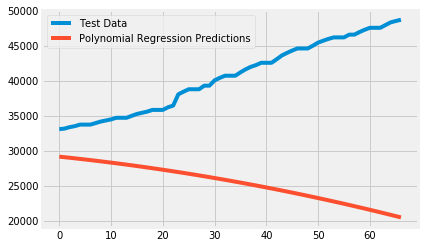

In [163]:
prediction(spain_deaths)

MAE: 5517.7472624093225
MSE: 55438305.77249796
-1.8609099447893558
          Date  Predicted number of Confirmed Cases
0   12/18/2020                               6829.0
1   12/19/2020                               6777.0
2   12/20/2020                               6724.0
3   12/21/2020                               6671.0
4   12/22/2020                               6618.0
5   12/23/2020                               6563.0
6   12/24/2020                               6509.0
7   12/25/2020                               6454.0
8   12/26/2020                               6398.0
9   12/27/2020                               6342.0
10  12/28/2020                               6286.0
11  12/29/2020                               6229.0
12  12/30/2020                               6171.0
13  12/31/2020                               6113.0
14  01/01/2021                               6055.0
15  01/02/2021                               5996.0
16  01/03/2021                               5937

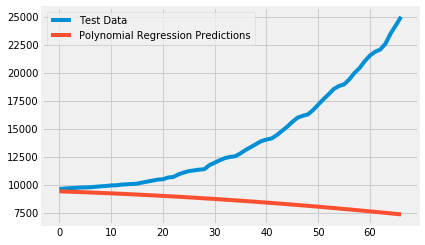

In [164]:
prediction(germany_deaths)

MAE: 18082.883721232123
MSE: 459366061.22832173
-4.7388914559982895
          Date  Predicted number of Confirmed Cases
0   12/18/2020                              19633.0
1   12/19/2020                              19424.0
2   12/20/2020                              19214.0
3   12/21/2020                              19002.0
4   12/22/2020                              18788.0
5   12/23/2020                              18573.0
6   12/24/2020                              18356.0
7   12/25/2020                              18137.0
8   12/26/2020                              17916.0
9   12/27/2020                              17694.0
10  12/28/2020                              17470.0
11  12/29/2020                              17244.0
12  12/30/2020                              17017.0
13  12/31/2020                              16787.0
14  01/01/2021                              16557.0
15  01/02/2021                              16324.0
16  01/03/2021                              1609

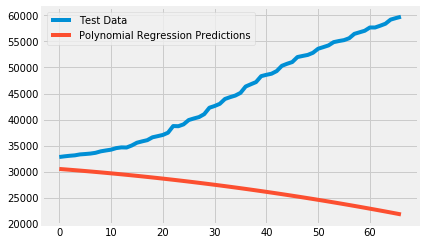

In [165]:
prediction(france_deaths)

MAE: 19144.061077471983
MSE: 554064182.2835116
-4.489251434955454
          Date  Predicted number of Confirmed Cases
0   12/18/2020                              18301.0
1   12/19/2020                              18016.0
2   12/20/2020                              17729.0
3   12/21/2020                              17440.0
4   12/22/2020                              17148.0
5   12/23/2020                              16855.0
6   12/24/2020                              16559.0
7   12/25/2020                              16261.0
8   12/26/2020                              15961.0
9   12/27/2020                              15659.0
10  12/28/2020                              15354.0
11  12/29/2020                              15048.0
12  12/30/2020                              14739.0
13  12/31/2020                              14428.0
14  01/01/2021                              14115.0
15  01/02/2021                              13800.0
16  01/03/2021                              13483.

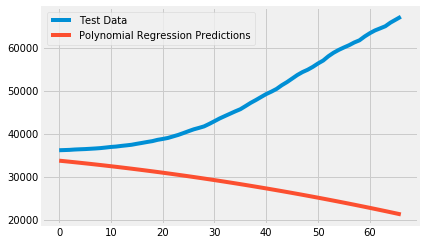

In [166]:
prediction(italy_deaths)

MAE: 1552.279778905993
MSE: 2775426.2449821583
-132593.96832469414
          Date  Predicted number of Confirmed Cases
0   12/18/2020                               1617.0
1   12/19/2020                               1574.0
2   12/20/2020                               1531.0
3   12/21/2020                               1487.0
4   12/22/2020                               1444.0
5   12/23/2020                               1400.0
6   12/24/2020                               1355.0
7   12/25/2020                               1311.0
8   12/26/2020                               1266.0
9   12/27/2020                               1221.0
10  12/28/2020                               1175.0
11  12/29/2020                               1130.0
12  12/30/2020                               1084.0
13  12/31/2020                               1038.0
14  01/01/2021                                991.0
15  01/02/2021                                945.0
16  01/03/2021                                898

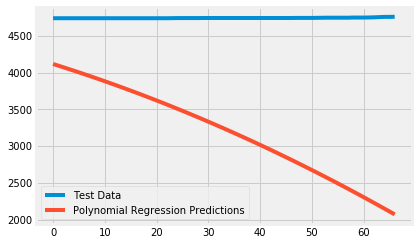

In [167]:
prediction(china_deaths)